**1/ download dataset**

[yahoo finance](https://finance.yahoo.com/quote/MSFT/history/)

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./MSFT.csv')
print(df.shape)
df.head()

(9137, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064383,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400


**2/ preprocessing data - visualization - EDA**

In [3]:
df1 = df.copy()
df1 = df1[['Date','Close']]
df1

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9132,2022-06-06,268.750000
9133,2022-06-07,272.500000
9134,2022-06-08,270.410004
9135,2022-06-09,264.790009


In [4]:
df1['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9132    2022-06-06
9133    2022-06-07
9134    2022-06-08
9135    2022-06-09
9136    2022-06-10
Name: Date, Length: 9137, dtype: object

In [5]:
df1['Date'][0].split('-')

['1986', '03', '13']

In [6]:
def str_to_datetime(s):
    '''
    Convert string to datetime format
    '''
    split = s.split('-')
    year,month,day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year= year,month=month, day=day)

# test your function
datetime_object = str_to_datetime(df1['Date'][0])
datetime_object

datetime.datetime(1986, 3, 13, 0, 0)

In [7]:
# apply the function to 'Date' column
df1['Date'] = df1['Date'].apply(str_to_datetime)
df1['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9132   2022-06-06
9133   2022-06-07
9134   2022-06-08
9135   2022-06-09
9136   2022-06-10
Name: Date, Length: 9137, dtype: datetime64[ns]

In [8]:
# set the index is Date column
df1.index = df1.pop('Date')
df1

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2022-06-06,268.750000
2022-06-07,272.500000
2022-06-08,270.410004


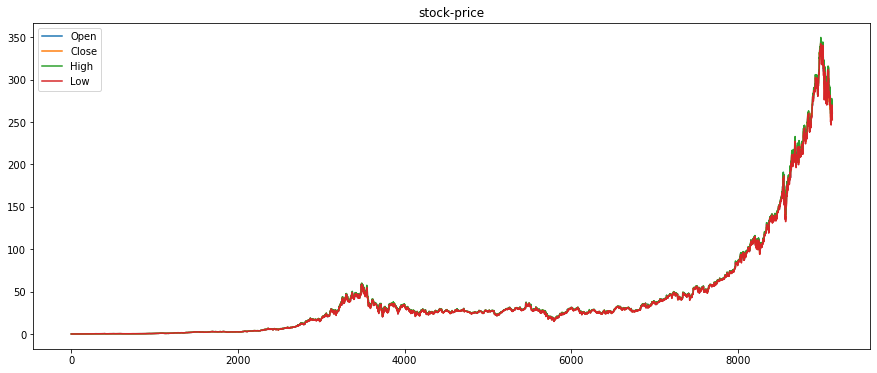

In [9]:
# plot
plt.figure(figsize = (15,6))
plt.plot(df.index,df['Open'],label = 'Open')
plt.plot(df.index,df['Close'],label = 'Close')
plt.plot(df.index,df['High'],label = 'High')
plt.plot(df.index,df['Low'],label = 'Low')
plt.legend()
plt.title('stock-price')
plt.savefig('./imgs/MSFT-stock-price.png')
plt.show()

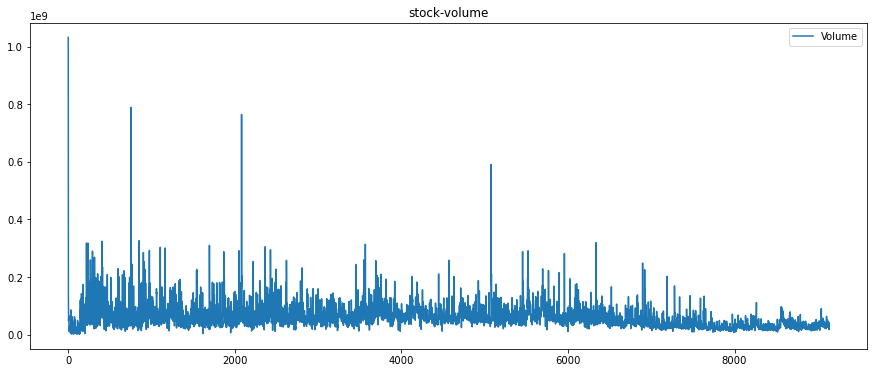

In [10]:
plt.figure(figsize = (15,6))
plt.plot(df.index,df['Volume'],label = 'Volume')
plt.legend()
plt.title('stock-volume')
plt.savefig('./imgs/MSFT-stock-volume.png')
plt.show()

We will forcus on 'Close' price

In [11]:
df1['Close'].describe()

count    9137.000000
mean       42.741320
std        62.281374
min         0.090278
25%         4.414063
50%        26.879999
75%        40.468750
max       343.109985
Name: Close, dtype: float64

In [12]:
def df_to_windowed_df(dataframe,first_date_str,last_date_str,n= 3):
    
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)
    print(f'first_date: {first_date} last_date: {last_date}')
    target_date = first_date
    dates =[]
    X = []
    Y = []
    last_time = False
    
    while True:
        
        df_subset = dataframe.loc[:target_date].tail(n+1)
        print(f'df_subset: {df_subset.shape}')
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return
        
        values = df_subset['Close'].to_numpy()
        x = values[:-1]
        y = values[-1] # n-1 is input , y is the last value
        dates.append(target_date)
        X.append(x)
        Y.append(y)
        
        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days = 7)]
        # get the next date
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0]) # [last_day_last_week,first_day_next_week]
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year,month,day = year_month_day
        next_date = datetime.datetime(day = int(day),month = int(month),year = int(year))
        print(f'next_date: {next_date}')
        
        if last_time:
            break
        
        target_date = next_date
        if target_date == last_date:
            last_time = True
    
    return X,Y,dates

In [13]:
seq_len = 3
df_to_windowed_df(df1,'2020-01-25','2022-03-23',n=seq_len)

first_date: 2020-01-25 00:00:00 last_date: 2022-03-23 00:00:00
df_subset: (4, 1)
next_date: 2020-01-28 00:00:00
df_subset: (4, 1)
next_date: 2020-01-29 00:00:00
df_subset: (4, 1)
next_date: 2020-01-30 00:00:00
df_subset: (4, 1)
next_date: 2020-01-31 00:00:00
df_subset: (4, 1)
next_date: 2020-02-03 00:00:00
df_subset: (4, 1)
next_date: 2020-02-04 00:00:00
df_subset: (4, 1)
next_date: 2020-02-05 00:00:00
df_subset: (4, 1)
next_date: 2020-02-06 00:00:00
df_subset: (4, 1)
next_date: 2020-02-07 00:00:00
df_subset: (4, 1)
next_date: 2020-02-10 00:00:00
df_subset: (4, 1)
next_date: 2020-02-11 00:00:00
df_subset: (4, 1)
next_date: 2020-02-12 00:00:00
df_subset: (4, 1)
next_date: 2020-02-13 00:00:00
df_subset: (4, 1)
next_date: 2020-02-14 00:00:00
df_subset: (4, 1)
next_date: 2020-02-18 00:00:00
df_subset: (4, 1)
next_date: 2020-02-19 00:00:00
df_subset: (4, 1)
next_date: 2020-02-20 00:00:00
df_subset: (4, 1)
next_date: 2020-02-21 00:00:00
df_subset: (4, 1)
next_date: 2020-02-24 00:00:00
df_sub

next_date: 2020-10-01 00:00:00
df_subset: (4, 1)
next_date: 2020-10-02 00:00:00
df_subset: (4, 1)
next_date: 2020-10-05 00:00:00
df_subset: (4, 1)
next_date: 2020-10-06 00:00:00
df_subset: (4, 1)
next_date: 2020-10-07 00:00:00
df_subset: (4, 1)
next_date: 2020-10-08 00:00:00
df_subset: (4, 1)
next_date: 2020-10-09 00:00:00
df_subset: (4, 1)
next_date: 2020-10-12 00:00:00
df_subset: (4, 1)
next_date: 2020-10-13 00:00:00
df_subset: (4, 1)
next_date: 2020-10-14 00:00:00
df_subset: (4, 1)
next_date: 2020-10-15 00:00:00
df_subset: (4, 1)
next_date: 2020-10-16 00:00:00
df_subset: (4, 1)
next_date: 2020-10-19 00:00:00
df_subset: (4, 1)
next_date: 2020-10-20 00:00:00
df_subset: (4, 1)
next_date: 2020-10-21 00:00:00
df_subset: (4, 1)
next_date: 2020-10-22 00:00:00
df_subset: (4, 1)
next_date: 2020-10-23 00:00:00
df_subset: (4, 1)
next_date: 2020-10-26 00:00:00
df_subset: (4, 1)
next_date: 2020-10-27 00:00:00
df_subset: (4, 1)
next_date: 2020-10-28 00:00:00
df_subset: (4, 1)
next_date: 2020-10-2

next_date: 2021-11-19 00:00:00
df_subset: (4, 1)
next_date: 2021-11-22 00:00:00
df_subset: (4, 1)
next_date: 2021-11-23 00:00:00
df_subset: (4, 1)
next_date: 2021-11-24 00:00:00
df_subset: (4, 1)
next_date: 2021-11-26 00:00:00
df_subset: (4, 1)
next_date: 2021-11-29 00:00:00
df_subset: (4, 1)
next_date: 2021-11-30 00:00:00
df_subset: (4, 1)
next_date: 2021-12-01 00:00:00
df_subset: (4, 1)
next_date: 2021-12-02 00:00:00
df_subset: (4, 1)
next_date: 2021-12-03 00:00:00
df_subset: (4, 1)
next_date: 2021-12-06 00:00:00
df_subset: (4, 1)
next_date: 2021-12-07 00:00:00
df_subset: (4, 1)
next_date: 2021-12-08 00:00:00
df_subset: (4, 1)
next_date: 2021-12-09 00:00:00
df_subset: (4, 1)
next_date: 2021-12-10 00:00:00
df_subset: (4, 1)
next_date: 2021-12-13 00:00:00
df_subset: (4, 1)
next_date: 2021-12-14 00:00:00
df_subset: (4, 1)
next_date: 2021-12-15 00:00:00
df_subset: (4, 1)
next_date: 2021-12-16 00:00:00
df_subset: (4, 1)
next_date: 2021-12-17 00:00:00
df_subset: (4, 1)
next_date: 2021-12-2

([array([166.5     , 165.699997, 166.720001]),
  array([166.720001, 165.039993, 162.279999]),
  array([165.039993, 162.279999, 165.460007]),
  array([162.279999, 165.460007, 168.039993]),
  array([165.460007, 168.039993, 172.779999]),
  array([168.039993, 172.779999, 170.229996]),
  array([172.779999, 170.229996, 174.380005]),
  array([170.229996, 174.380005, 180.119995]),
  array([174.380005, 180.119995, 179.899994]),
  array([180.119995, 179.899994, 183.630005]),
  array([179.899994, 183.630005, 183.889999]),
  array([183.630005, 183.889999, 188.699997]),
  array([183.889999, 188.699997, 184.440002]),
  array([188.699997, 184.440002, 184.710007]),
  array([184.440002, 184.710007, 183.710007]),
  array([184.710007, 183.710007, 185.350006]),
  array([183.710007, 185.350006, 187.229996]),
  array([185.350006, 187.229996, 187.279999]),
  array([187.229996, 187.279999, 184.419998]),
  array([187.279999, 184.419998, 178.589996]),
  array([184.419998, 178.589996, 170.889999]),
  array([178.

In [14]:
seq_len = 5
X,Y,dates = df_to_windowed_df(df1,'2020-01-25','2022-03-23',n=seq_len)

first_date: 2020-01-25 00:00:00 last_date: 2022-03-23 00:00:00
df_subset: (6, 1)
next_date: 2020-01-28 00:00:00
df_subset: (6, 1)
next_date: 2020-01-29 00:00:00
df_subset: (6, 1)
next_date: 2020-01-30 00:00:00
df_subset: (6, 1)
next_date: 2020-01-31 00:00:00
df_subset: (6, 1)
next_date: 2020-02-03 00:00:00
df_subset: (6, 1)
next_date: 2020-02-04 00:00:00
df_subset: (6, 1)
next_date: 2020-02-05 00:00:00
df_subset: (6, 1)
next_date: 2020-02-06 00:00:00
df_subset: (6, 1)
next_date: 2020-02-07 00:00:00
df_subset: (6, 1)
next_date: 2020-02-10 00:00:00
df_subset: (6, 1)
next_date: 2020-02-11 00:00:00
df_subset: (6, 1)
next_date: 2020-02-12 00:00:00
df_subset: (6, 1)
next_date: 2020-02-13 00:00:00
df_subset: (6, 1)
next_date: 2020-02-14 00:00:00
df_subset: (6, 1)
next_date: 2020-02-18 00:00:00
df_subset: (6, 1)
next_date: 2020-02-19 00:00:00
df_subset: (6, 1)
next_date: 2020-02-20 00:00:00
df_subset: (6, 1)
next_date: 2020-02-21 00:00:00
df_subset: (6, 1)
next_date: 2020-02-24 00:00:00
df_sub

next_date: 2021-02-03 00:00:00
df_subset: (6, 1)
next_date: 2021-02-04 00:00:00
df_subset: (6, 1)
next_date: 2021-02-05 00:00:00
df_subset: (6, 1)
next_date: 2021-02-08 00:00:00
df_subset: (6, 1)
next_date: 2021-02-09 00:00:00
df_subset: (6, 1)
next_date: 2021-02-10 00:00:00
df_subset: (6, 1)
next_date: 2021-02-11 00:00:00
df_subset: (6, 1)
next_date: 2021-02-12 00:00:00
df_subset: (6, 1)
next_date: 2021-02-16 00:00:00
df_subset: (6, 1)
next_date: 2021-02-17 00:00:00
df_subset: (6, 1)
next_date: 2021-02-18 00:00:00
df_subset: (6, 1)
next_date: 2021-02-19 00:00:00
df_subset: (6, 1)
next_date: 2021-02-22 00:00:00
df_subset: (6, 1)
next_date: 2021-02-23 00:00:00
df_subset: (6, 1)
next_date: 2021-02-24 00:00:00
df_subset: (6, 1)
next_date: 2021-02-25 00:00:00
df_subset: (6, 1)
next_date: 2021-02-26 00:00:00
df_subset: (6, 1)
next_date: 2021-03-01 00:00:00
df_subset: (6, 1)
next_date: 2021-03-02 00:00:00
df_subset: (6, 1)
next_date: 2021-03-03 00:00:00
df_subset: (6, 1)
next_date: 2021-03-0

next_date: 2022-03-04 00:00:00
df_subset: (6, 1)
next_date: 2022-03-07 00:00:00
df_subset: (6, 1)
next_date: 2022-03-08 00:00:00
df_subset: (6, 1)
next_date: 2022-03-09 00:00:00
df_subset: (6, 1)
next_date: 2022-03-10 00:00:00
df_subset: (6, 1)
next_date: 2022-03-11 00:00:00
df_subset: (6, 1)
next_date: 2022-03-14 00:00:00
df_subset: (6, 1)
next_date: 2022-03-15 00:00:00
df_subset: (6, 1)
next_date: 2022-03-16 00:00:00
df_subset: (6, 1)
next_date: 2022-03-17 00:00:00
df_subset: (6, 1)
next_date: 2022-03-18 00:00:00
df_subset: (6, 1)
next_date: 2022-03-21 00:00:00
df_subset: (6, 1)
next_date: 2022-03-22 00:00:00
df_subset: (6, 1)
next_date: 2022-03-23 00:00:00
df_subset: (6, 1)
next_date: 2022-03-24 00:00:00


In [15]:
X = np.array(X)
print(X.shape) # day-1,day-2,day-3
print(len(Y)) # ground-truth = day-4
print(len(dates))

(545, 5)
545
545


In [16]:
ret_df = pd.DataFrame({})
ret_df['Target Date'] = dates

In [17]:
for i in range(seq_len):
    #print(i)
    #print(X[:,i].shape) # loop over each colum, meaning each day
    ret_df[f'Target-{seq_len-i}'] = X[:,i]
    
ret_df

,Target Date,Target-5,Target-4,Target-3,Target-2,Target-1
0,2020-01-25,166.169998,167.100006,166.500000,165.699997,166.720001
1,2020-01-28,166.500000,165.699997,166.720001,165.039993,162.279999
2,2020-01-29,165.699997,166.720001,165.039993,162.279999,165.460007
3,2020-01-30,166.720001,165.039993,162.279999,165.460007,168.039993
4,2020-01-31,165.039993,162.279999,165.460007,168.039993,172.779999
...,...,...,...,...,...,...
540,2022-03-17,285.589996,280.070007,276.440002,287.149994,294.390015
541,2022-03-18,280.070007,276.440002,287.149994,294.390015,295.220001
542,2022-03-21,276.440002,287.149994,294.390015,295.220001,300.429993
543,2022-03-22,287.149994,294.390015,295.220001,300.429993,299.160004


In [18]:
ret_df['Target'] = Y
ret_df

,Target Date,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2020-01-25,166.169998,167.100006,166.500000,165.699997,166.720001,165.039993
1,2020-01-28,166.500000,165.699997,166.720001,165.039993,162.279999,165.460007
2,2020-01-29,165.699997,166.720001,165.039993,162.279999,165.460007,168.039993
3,2020-01-30,166.720001,165.039993,162.279999,165.460007,168.039993,172.779999
4,2020-01-31,165.039993,162.279999,165.460007,168.039993,172.779999,170.229996
...,...,...,...,...,...,...,...
540,2022-03-17,285.589996,280.070007,276.440002,287.149994,294.390015,295.220001
541,2022-03-18,280.070007,276.440002,287.149994,294.390015,295.220001,300.429993
542,2022-03-21,276.440002,287.149994,294.390015,295.220001,300.429993,299.160004
543,2022-03-22,287.149994,294.390015,295.220001,300.429993,299.160004,304.059998


In [19]:
def df_to_windowed_df(dataframe,first_date_str,last_date_str,n=3):
    
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)
    target_date = first_date
    dates =[]
    X = []
    Y = []
    last_time = False
    
    while True:
        
        df_subset = dataframe.loc[:target_date].tail(n+1)
        if len(df_subset) != n+1:
            return
        
        values = df_subset['Close'].to_numpy()
        x = values[:-1]
        y = values[-1] # n-1 is input , y is the last value
        dates.append(target_date)
        X.append(x)
        Y.append(y)
        
        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days = 7)]
        # get the next date
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0]) # [last_day_last_week,first_day_next_week]
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year,month,day = year_month_day
        next_date = datetime.datetime(day = int(day),month = int(month),year = int(year))
        
        if last_time:
            break
        
        target_date = next_date
        if target_date == last_date:
            last_time = True
    
    # convert to dataframe
    X = np.array(X)
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
    
    for i in range(seq_len):
        ret_df[f'Target-{seq_len-i}'] = X[:,i]
    
    ret_df['Target'] = Y
    
    return ret_df

In [20]:
seq_len = 5
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df1, '2020-01-25', '2022-03-23', n=seq_len)
windowed_df

,Target Date,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2020-01-25,166.169998,167.100006,166.500000,165.699997,166.720001,165.039993
1,2020-01-28,166.500000,165.699997,166.720001,165.039993,162.279999,165.460007
2,2020-01-29,165.699997,166.720001,165.039993,162.279999,165.460007,168.039993
3,2020-01-30,166.720001,165.039993,162.279999,165.460007,168.039993,172.779999
4,2020-01-31,165.039993,162.279999,165.460007,168.039993,172.779999,170.229996
...,...,...,...,...,...,...,...
540,2022-03-17,285.589996,280.070007,276.440002,287.149994,294.390015,295.220001
541,2022-03-18,280.070007,276.440002,287.149994,294.390015,295.220001,300.429993
542,2022-03-21,276.440002,287.149994,294.390015,295.220001,300.429993,299.160004
543,2022-03-22,287.149994,294.390015,295.220001,300.429993,299.160004,304.059998


In [23]:
df_as_np = windowed_df.to_numpy()
df_as_np.shape

(545, 7)

In [28]:
dates = df_as_np[:,0]
print(dates.shape)
dates

(545,)


array([Timestamp('2020-01-25 00:00:00'), Timestamp('2020-01-28 00:00:00'),
       Timestamp('2020-01-29 00:00:00'), Timestamp('2020-01-30 00:00:00'),
       Timestamp('2020-01-31 00:00:00'), Timestamp('2020-02-03 00:00:00'),
       Timestamp('2020-02-04 00:00:00'), Timestamp('2020-02-05 00:00:00'),
       Timestamp('2020-02-06 00:00:00'), Timestamp('2020-02-07 00:00:00'),
       Timestamp('2020-02-10 00:00:00'), Timestamp('2020-02-11 00:00:00'),
       Timestamp('2020-02-12 00:00:00'), Timestamp('2020-02-13 00:00:00'),
       Timestamp('2020-02-14 00:00:00'), Timestamp('2020-02-18 00:00:00'),
       Timestamp('2020-02-19 00:00:00'), Timestamp('2020-02-20 00:00:00'),
       Timestamp('2020-02-21 00:00:00'), Timestamp('2020-02-24 00:00:00'),
       Timestamp('2020-02-25 00:00:00'), Timestamp('2020-02-26 00:00:00'),
       Timestamp('2020-02-27 00:00:00'), Timestamp('2020-02-28 00:00:00'),
       Timestamp('2020-03-02 00:00:00'), Timestamp('2020-03-03 00:00:00'),
       Timestamp('2020-03

In [29]:
middle_matrix = df_as_np[:,1:-1]
print(middle_matrix.shape)
middle_matrix

(545, 5)


array([[166.169998, 167.100006, 166.5, 165.699997, 166.720001],
       [166.5, 165.699997, 166.720001, 165.039993, 162.279999],
       [165.699997, 166.720001, 165.039993, 162.279999, 165.460007],
       ...,
       [276.440002, 287.149994, 294.390015, 295.220001, 300.429993],
       [287.149994, 294.390015, 295.220001, 300.429993, 299.160004],
       [294.390015, 295.220001, 300.429993, 299.160004, 304.059998]],
      dtype=object)

In [32]:
X = np.expand_dims(middle_matrix,-1)
print(X.shape)

(545, 5, 1)


In [33]:
Y = df_as_np[:,-1]
Y.shape

(545,)

In [34]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    dates = df_as_np[:,0]
    middle_matrix = df_as_np[:,1:-1]
    X = np.expand_dims(middle_matrix,-1) # (number_of_sample,seq_len,input_dim)
    Y = df_as_np[:,-1] # (number_of_sample,output_dim)
    return dates,X.astype(np.float32),Y.astype(np.float32)

dates,X,y = windowed_df_to_date_X_y(windowed_df)

dates.shape,X.shape,y.shape

((545,), (545, 5, 1), (545,))

iteration at 80 percent: 436, iteration at q90 percent: 490


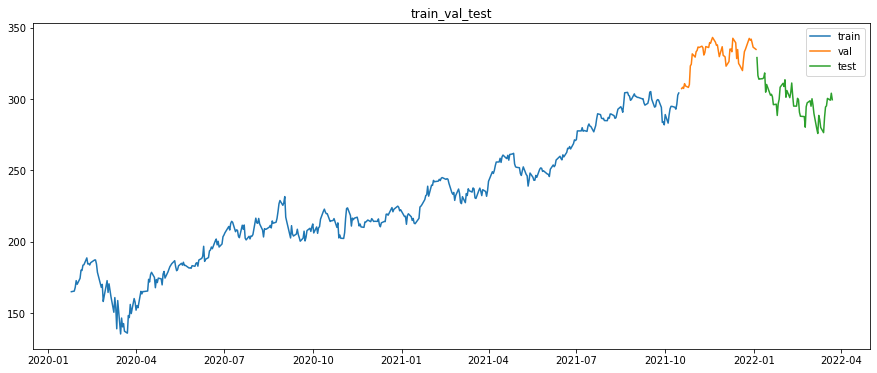

In [39]:
# split train-val-test 80-10-10
q_80 = int(len(dates)*.8)
q_90 = int(len(dates)*.9)

print(f'iteration at 80 percent: {q_80}, iteration at q90 percent: {q_90}')

dates_train,X_train,y_train = dates[:q_80],X[:q_80],y[:q_80]
dates_val,X_val,y_val = dates[q_80:q_90],X[q_80:q_90],y[q_80:q_90]
dates_test,X_test,y_test = dates[q_90:],X[q_90:],y[q_90:]

# plot the figure
plt.figure(figsize = (15,6))
plt.plot(dates_train,y_train,label = 'train')
plt.plot(dates_val,y_val,label = 'val')
plt.plot(dates_test,y_test,label = 'test')
plt.legend()
plt.title('train_val_test')
plt.savefig('./imgs/MSFT_train_val_test.png')
plt.show()

**4/ build model**

Using LSTM, GRU or any RNN type model, we don't need to count `accuracy` in the metrics because your prediction never reach the ground-truth

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import layers

In [55]:
model = Sequential([layers.Input((seq_len,1)),
                    layers.LSTM(64),
                    layers.Dense(32,activation = 'relu'),
                    layers.Dense(32,activation = 'relu'),
                    layers.Dense(1)
                   ])

model.compile(loss = 'mse',
             optimizer = Adam(learning_rate = 1e-3),
             metrics = ['mean_absolute_error']
             )

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 20,065
Trainable params: 20,065
Non-trainable params: 0
_________________________________________________________________


**5/ train model**

In [56]:
history = model.fit(X_train,y_train,validation_data = (X_val,y_val),epochs = 100,verbose = True)

Epoch 1/100
14/14 [==============================] - 3s 61ms/step - loss: 51867.6914 - mean_absolute_error: 224.0260 - val_loss: 107978.2344 - val_mean_absolute_error: 328.4473
Epoch 2/100
14/14 [==============================] - 0s 10ms/step - loss: 51077.5430 - mean_absolute_error: 222.2608 - val_loss: 106603.4609 - val_mean_absolute_error: 326.3478
Epoch 3/100
14/14 [==============================] - 0s 11ms/step - loss: 49807.8125 - mean_absolute_error: 219.3695 - val_loss: 103852.6172 - val_mean_absolute_error: 322.1049
Epoch 4/100
14/14 [==============================] - 0s 13ms/step - loss: 47382.1523 - mean_absolute_error: 213.7722 - val_loss: 99575.0703 - val_mean_absolute_error: 315.3954
Epoch 5/100
14/14 [==============================] - 0s 16ms/step - loss: 43970.7031 - mean_absolute_error: 205.5536 - val_loss: 93019.9453 - val_mean_absolute_error: 304.8248
Epoch 6/100
14/14 [==============================] - 0s 10ms/step - loss: 38134.0156 - mean_absolute_error: 190.9034 

Epoch 49/100
14/14 [==============================] - 0s 7ms/step - loss: 20.0175 - mean_absolute_error: 3.4016 - val_loss: 766.6763 - val_mean_absolute_error: 26.3509
Epoch 50/100
14/14 [==============================] - 0s 7ms/step - loss: 19.6583 - mean_absolute_error: 3.3482 - val_loss: 760.3972 - val_mean_absolute_error: 26.2917
Epoch 51/100
14/14 [==============================] - 0s 9ms/step - loss: 20.8065 - mean_absolute_error: 3.4247 - val_loss: 770.4435 - val_mean_absolute_error: 26.5117
Epoch 52/100
14/14 [==============================] - 0s 7ms/step - loss: 20.5085 - mean_absolute_error: 3.3874 - val_loss: 774.4141 - val_mean_absolute_error: 26.6273
Epoch 53/100
14/14 [==============================] - 0s 10ms/step - loss: 20.2895 - mean_absolute_error: 3.4345 - val_loss: 750.8918 - val_mean_absolute_error: 26.1528
Epoch 54/100
14/14 [==============================] - 0s 8ms/step - loss: 24.0490 - mean_absolute_error: 3.7589 - val_loss: 753.8282 - val_mean_absolute_error:

Epoch 98/100
14/14 [==============================] - 0s 7ms/step - loss: 18.4649 - mean_absolute_error: 3.2542 - val_loss: 594.3906 - val_mean_absolute_error: 23.1301
Epoch 99/100
14/14 [==============================] - 0s 10ms/step - loss: 18.3249 - mean_absolute_error: 3.2100 - val_loss: 580.2965 - val_mean_absolute_error: 22.7943
Epoch 100/100
14/14 [==============================] - 0s 7ms/step - loss: 19.7861 - mean_absolute_error: 3.3622 - val_loss: 557.2933 - val_mean_absolute_error: 22.2259


<AxesSubplot:>

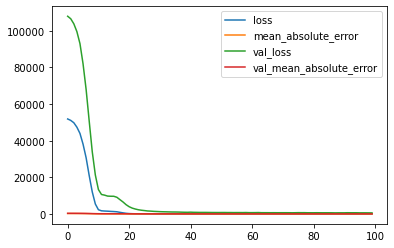

In [57]:
# plot the loss curve
pd.DataFrame(history.history).plot()

**6/ evaluate model**

In [58]:
model.evaluate(X_val,y_val)

2/2 [==============================] - 0s 5ms/step - loss: 557.2933 - mean_absolute_error: 22.2259


[557.2933349609375, 22.225866317749023]

In [59]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 53.3337 - mean_absolute_error: 5.9553


[53.333683013916016, 5.955280780792236]

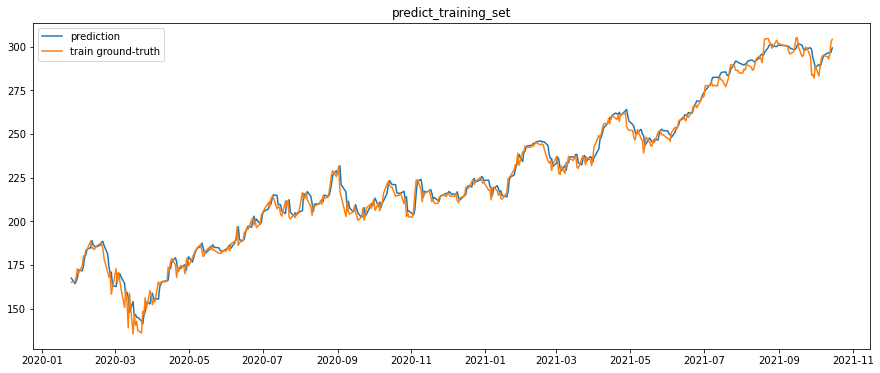

In [67]:
train_preds = model.predict(X_train).flatten()

plt.figure(figsize = (15,6))
plt.plot(dates_train,train_preds,label = 'prediction')
plt.plot(dates_train,y_train,label = 'train ground-truth')
plt.legend()
plt.title('predict_training_set')
plt.savefig('./imgs/MSFT_predict_training_set.png')
plt.show()

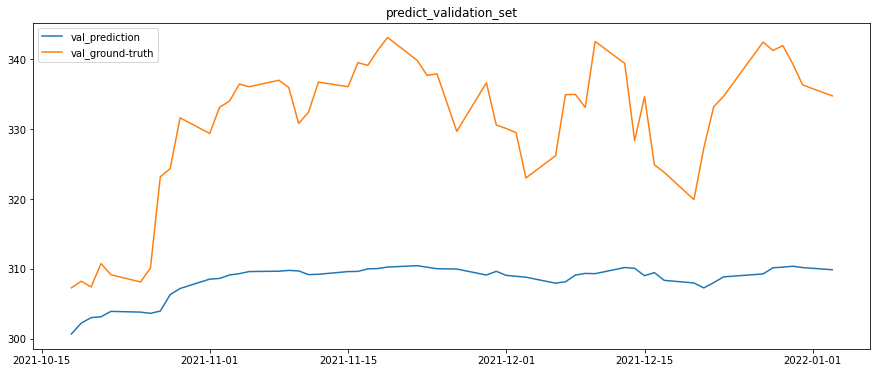

In [68]:
val_preds = model.predict(X_val).flatten()

plt.figure(figsize = (15,6))
plt.plot(dates_val,val_preds,label = 'val_prediction')
plt.plot(dates_val,y_val,label = 'val_ground-truth')
plt.legend()
plt.title('predict_validation_set')
plt.savefig('./imgs/MSFT_predict_validation_set.png')
plt.show()

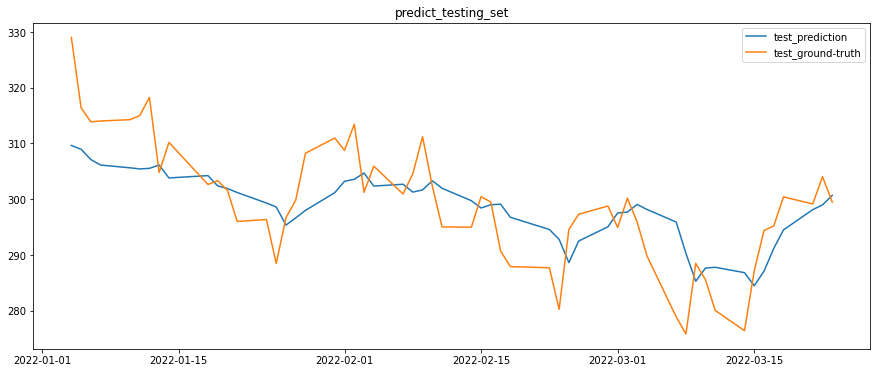

In [69]:
test_preds = model.predict(X_test).flatten()

plt.figure(figsize = (15,6))
plt.plot(dates_test,test_preds,label = 'test_prediction')
plt.plot(dates_test,y_test,label = 'test_ground-truth')
plt.legend()
plt.title('predict_testing_set')
plt.savefig('./imgs/MSFT_predict_testing_set.png')
plt.show()

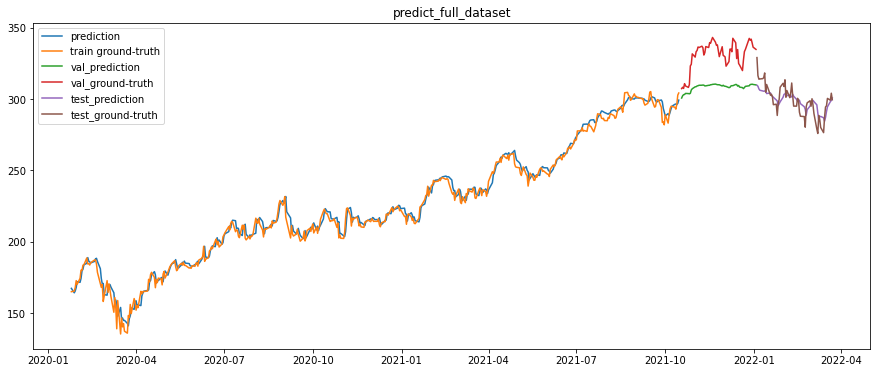

In [70]:
plt.figure(figsize = (15,6))
plt.plot(dates_train,train_preds,label = 'prediction')
plt.plot(dates_train,y_train,label = 'train ground-truth')
plt.plot(dates_val,val_preds,label = 'val_prediction')
plt.plot(dates_val,y_val,label = 'val_ground-truth')
plt.plot(dates_test,test_preds,label = 'test_prediction')
plt.plot(dates_test,y_test,label = 'test_ground-truth')
plt.legend()
plt.title('predict_full_dataset')
plt.savefig('./imgs/MSFT_ppredict_full_dataset.png')
plt.show()

In [71]:
from copy import deepcopy

In [99]:
last_window = deepcopy(X_train[-1])
print(last_window.shape)
last_window

(5, 1)


array([[294.85],
       [294.23],
       [292.88],
       [296.31],
       [302.75]], dtype=float32)

In [100]:
next_pred = model.predict(np.expand_dims(last_window,0)).flatten()
next_pred

array([299.2193], dtype=float32)

In [101]:
zeros_array = np.zeros(last_window.shape)
zeros_array

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [102]:
zeros_array[:-1] = last_window[1:]
zeros_array

array([[294.23001099],
       [292.88000488],
       [296.30999756],
       [302.75      ],
       [  0.        ]])

In [103]:
zeros_array[-1] = next_pred
zeros_array

array([[294.23001099],
       [292.88000488],
       [296.30999756],
       [302.75      ],
       [299.21929932]])

In [104]:
'''
use your model to predict long-term, meaning let pretend val and test set is future input
predict the lastest input, then update it
'''

recursive_preds = []
recursive_dates = np.concatenate([dates_val,dates_test])
last_window = deepcopy(X_train[-1]) # the lastest input-days

for target_date in recursive_dates:
    #print(target_date)
    next_pred = model.predict(np.expand_dims(last_window,0)).flatten() # expand-dims (1-samples,seq_len,1)
    recursive_preds.append(next_pred)
    last_window[-1] = next_pred # update your lastest days
    # update the lasted window with your new prediction
    zeros_array = np.zeros(last_window.shape)
    zeros_array[:-1] = last_window[1:]
    zeros_array[-1] = next_pred
    last_window = zeros_array

In [107]:
recursive_preds

[array([299.2193], dtype=float32),
 array([298.90536], dtype=float32),
 array([299.2176], dtype=float32),
 array([299.44333], dtype=float32),
 array([299.55225], dtype=float32),
 array([299.62906], dtype=float32),
 array([299.67892], dtype=float32),
 array([299.71002], dtype=float32),
 array([299.7298], dtype=float32),
 array([299.74234], dtype=float32),
 array([299.7503], dtype=float32),
 array([299.75534], dtype=float32),
 array([299.7585], dtype=float32),
 array([299.76053], dtype=float32),
 array([299.7618], dtype=float32),
 array([299.76263], dtype=float32),
 array([299.76315], dtype=float32),
 array([299.76346], dtype=float32),
 array([299.76367], dtype=float32),
 array([299.76382], dtype=float32),
 array([299.7639], dtype=float32),
 array([299.76395], dtype=float32),
 array([299.76395], dtype=float32),
 array([299.76398], dtype=float32),
 array([299.76398], dtype=float32),
 array([299.76398], dtype=float32),
 array([299.76398], dtype=float32),
 array([299.76398], dtype=float32),

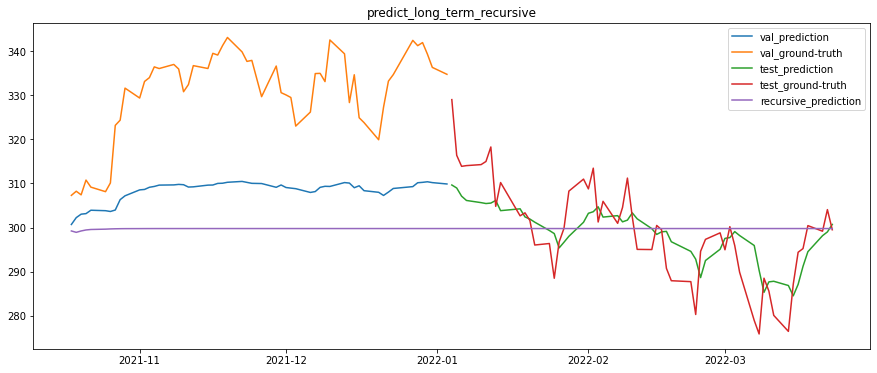

In [108]:
plt.figure(figsize = (15,6))
plt.plot(dates_val,val_preds,label = 'val_prediction')
plt.plot(dates_val,y_val,label = 'val_ground-truth')
plt.plot(dates_test,test_preds,label = 'test_prediction')
plt.plot(dates_test,y_test,label = 'test_ground-truth')
plt.plot(recursive_dates,recursive_preds,label = 'recursive_prediction')
plt.legend()
plt.title('predict_long_term_recursive')
plt.savefig('./imgs/MSFT_predict_long_term_recursive.png')
plt.show()

**7/ save and load model**

In [110]:
import tensorflow as tf

In [109]:
# save your model
model.save('lstm_model')

INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


In [112]:
# load your model
lstm_model = tf.keras.models.load_model('./lstm_model')

**8/ predict new-input**

In [113]:
import numpy as np

In [114]:
df = pd.read_csv('./MSFT.csv')
df['Close'].describe()

count    9137.000000
mean       42.741320
std        62.281374
min         0.090278
25%         4.414063
50%        26.879999
75%        40.468750
max       343.109985
Name: Close, dtype: float64

In [119]:
print(f"min_value: {df['Close'].min()}")
print(f"max_value: {df['Close'].max()}")

min_value: 0.090278
max_value: 343.109985


In [122]:
new_input = np.random.uniform(low = df['Close'].min(), high = df['Close'].max(),size = (seq_len,1))
new_input

array([[229.56416184],
       [172.56306615],
       [301.24160457],
       [272.47018967],
       [223.16284409]])

In [125]:
new_input = np.expand_dims(new_input,0)
lstm_model.predict(new_input)

array([[231.69974]], dtype=float32)

**9/ compare with GRU**

In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import layers

model = Sequential([layers.Input((seq_len,1)),
                    layers.GRU(64),
                    layers.Dense(32,activation = 'relu'),
                    layers.Dense(32,activation = 'relu'),
                    layers.Dense(1)
                   ])

model.compile(loss = 'mse',
             optimizer = Adam(learning_rate = 1e-3),
             metrics = ['mean_absolute_error']
             )

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 64)                12864     
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 33        
Total params: 16,033
Trainable params: 16,033
Non-trainable params: 0
_________________________________________________________________


In [136]:
history = model.fit(X_train,y_train,validation_data = (X_val,y_val),epochs = 100,verbose = True)

Epoch 1/100
14/14 [==============================] - 3s 43ms/step - loss: 52877.0078 - mean_absolute_error: 226.2774 - val_loss: 109395.1328 - val_mean_absolute_error: 330.5974
Epoch 2/100
14/14 [==============================] - 0s 10ms/step - loss: 52281.4023 - mean_absolute_error: 224.9525 - val_loss: 108742.5938 - val_mean_absolute_error: 329.6090
Epoch 3/100
14/14 [==============================] - 0s 12ms/step - loss: 51776.4219 - mean_absolute_error: 223.8319 - val_loss: 107821.2344 - val_mean_absolute_error: 328.2083
Epoch 4/100
14/14 [==============================] - 0s 12ms/step - loss: 50889.2148 - mean_absolute_error: 221.8282 - val_loss: 106072.5391 - val_mean_absolute_error: 325.5334
Epoch 5/100
14/14 [==============================] - 0s 12ms/step - loss: 49413.7266 - mean_absolute_error: 218.4491 - val_loss: 103319.9453 - val_mean_absolute_error: 321.2773
Epoch 6/100
14/14 [==============================] - 0s 11ms/step - loss: 46966.0039 - mean_absolute_error: 212.805

14/14 [==============================] - 0s 7ms/step - loss: 21.9148 - mean_absolute_error: 3.6000 - val_loss: 1122.1702 - val_mean_absolute_error: 32.2284
Epoch 49/100
14/14 [==============================] - 0s 7ms/step - loss: 23.0929 - mean_absolute_error: 3.6383 - val_loss: 1104.7542 - val_mean_absolute_error: 31.9801
Epoch 50/100
14/14 [==============================] - 0s 7ms/step - loss: 22.2468 - mean_absolute_error: 3.6458 - val_loss: 1082.1490 - val_mean_absolute_error: 31.6237
Epoch 51/100
14/14 [==============================] - 0s 9ms/step - loss: 21.6527 - mean_absolute_error: 3.5712 - val_loss: 1060.0352 - val_mean_absolute_error: 31.2783
Epoch 52/100
14/14 [==============================] - 0s 7ms/step - loss: 23.8892 - mean_absolute_error: 3.7725 - val_loss: 1020.9335 - val_mean_absolute_error: 30.6025
Epoch 53/100
14/14 [==============================] - 0s 8ms/step - loss: 24.5636 - mean_absolute_error: 3.8815 - val_loss: 1021.6103 - val_mean_absolute_error: 30.6692

Epoch 97/100
14/14 [==============================] - 0s 7ms/step - loss: 20.7821 - mean_absolute_error: 3.4340 - val_loss: 767.3407 - val_mean_absolute_error: 26.4461
Epoch 98/100
14/14 [==============================] - 0s 7ms/step - loss: 21.2997 - mean_absolute_error: 3.5330 - val_loss: 764.0910 - val_mean_absolute_error: 26.3859
Epoch 99/100
14/14 [==============================] - 0s 8ms/step - loss: 19.4098 - mean_absolute_error: 3.3616 - val_loss: 733.2308 - val_mean_absolute_error: 25.6899
Epoch 100/100
14/14 [==============================] - 0s 7ms/step - loss: 17.7949 - mean_absolute_error: 3.2069 - val_loss: 734.1355 - val_mean_absolute_error: 25.7340


<AxesSubplot:>

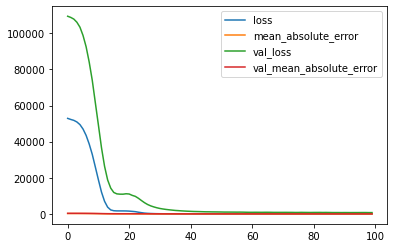

In [137]:
# plot the loss curve
pd.DataFrame(history.history).plot()

In [138]:
model.evaluate(X_val,y_val)

2/2 [==============================] - 0s 10ms/step - loss: 734.1355 - mean_absolute_error: 25.7340


[734.135498046875, 25.734004974365234]

In [139]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 17ms/step - loss: 62.7245 - mean_absolute_error: 6.4821


[62.724510192871094, 6.482122898101807]

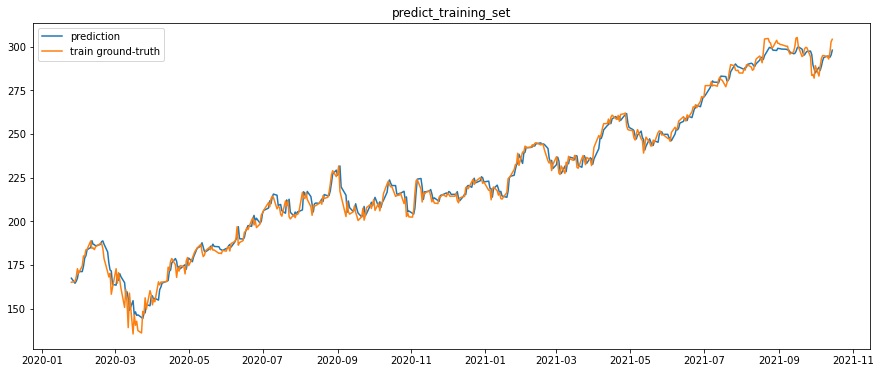

In [140]:
train_preds = model.predict(X_train).flatten()

plt.figure(figsize = (15,6))
plt.plot(dates_train,train_preds,label = 'prediction')
plt.plot(dates_train,y_train,label = 'train ground-truth')
plt.legend()
plt.title('predict_training_set')
plt.savefig('./imgs/MSFT_predict_training_set.png')
plt.show()

In [141]:
model.save('gru_model')

INFO:tensorflow:Assets written to: gru_model\assets


INFO:tensorflow:Assets written to: gru_model\assets


**10/ references**

[Stock Price Prediction & Forecasting with LSTM Neural Networks in Python](https://www.youtube.com/watch?v=CbTU92pbDKw&t=492s)

[Stock Price Prediction & Forecasting with LSTM Neural Networks in Python-colab](https://colab.research.google.com/drive/1Bk4zPQwAfzoSHZokKUefKL1s6lqmam6S?usp=sharing)

[LSTM Time Series Forecasting Tutorial in Python](https://www.youtube.com/watch?v=c0k-YLQGKjY)